In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [203]:
data=pd.read_csv("1.04.+Real-life+example.csv")

In [204]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Processing

In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [206]:
data.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [207]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [208]:
data.drop(["Model"],axis=1,inplace=True)

In [209]:
data.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [210]:
x=data.dropna(axis=0)

In [211]:
x.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


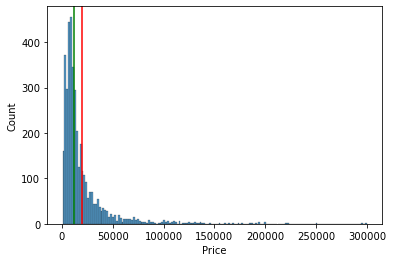

In [212]:
sns.histplot(x["Price"])
plt.axvline(x["Price"].mean(),color='r')
plt.axvline(x["Price"].median(),color='g')

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

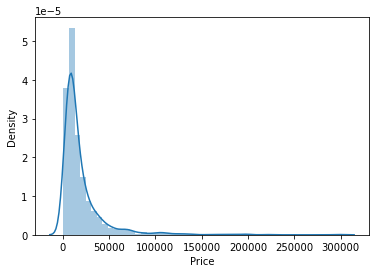

In [213]:
sns.distplot(x["Price"])

# dealing with outliers

In [214]:
#  therefore removing the top 1 % of values
X=x["Price"].quantile(0.99)
X

129812.51999999981

In [215]:
x=x[x["Price"]<=X]

In [216]:
x.describe(include="all")

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


In [217]:
#  now check the distribution

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price', ylabel='Density'>

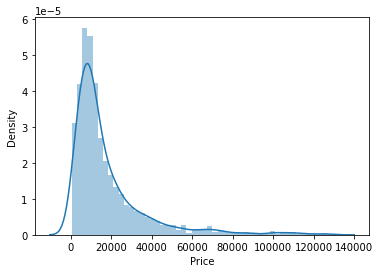

In [218]:
sns.distplot(x["Price"])

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

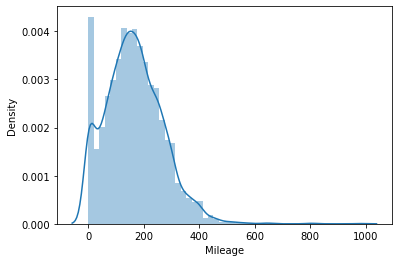

In [219]:
sns.distplot(x["Mileage"])

In [220]:
X=x["Mileage"].quantile(0.99)
x=x[x["Mileage"]<=X]

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mileage', ylabel='Density'>

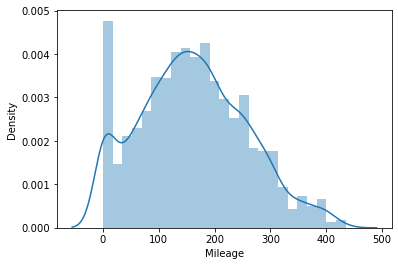

In [221]:
sns.distplot(x["Mileage"])

In [222]:
X=x[x["EngineV"]<6.5]
X.head()


,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011


E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EngineV', ylabel='Density'>

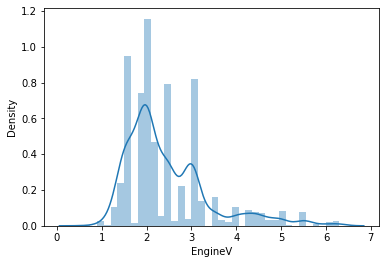

In [223]:
sns.distplot(X["EngineV"])

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

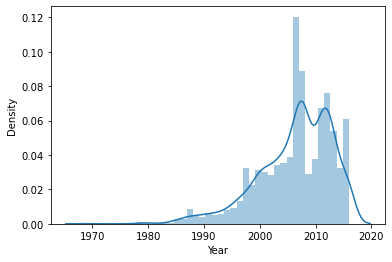

In [224]:
sns.distplot(X["Year"])

In [225]:
x=X["Year"].quantile(0.01)
x=X[X["Year"]>=x]

E:\Anacondafiles\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Year', ylabel='Density'>

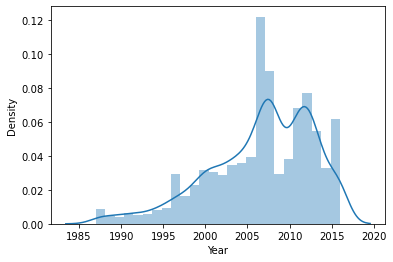

In [226]:
sns.distplot(x["Year"])

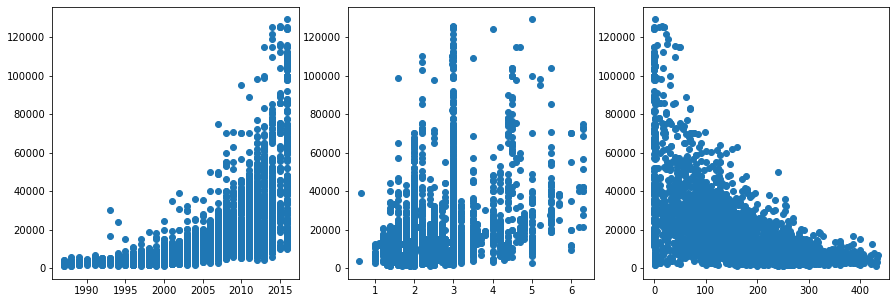

In [227]:
fig,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(15,5))
ax1.scatter(x=x["Year"],y=x["Price"])
ax2.scatter(x=x["EngineV"],y=x["Price"])
ax3.scatter(x=x["Mileage"],y=x["Price"])

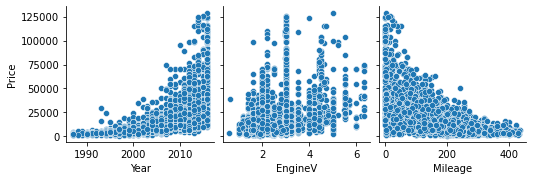

In [228]:
sns.pairplot(data=x  ,y_vars=["Price"],
    x_vars=["Year","EngineV","Mileage"])

therefore there are no linearity in the model  and we are going to use the log transformation


# Relaxing the assumption

In [229]:
log=np.log(x["Price"])
x["log_price"]=log

<ipython-input-229-550c6592c75c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x["log_price"]=log


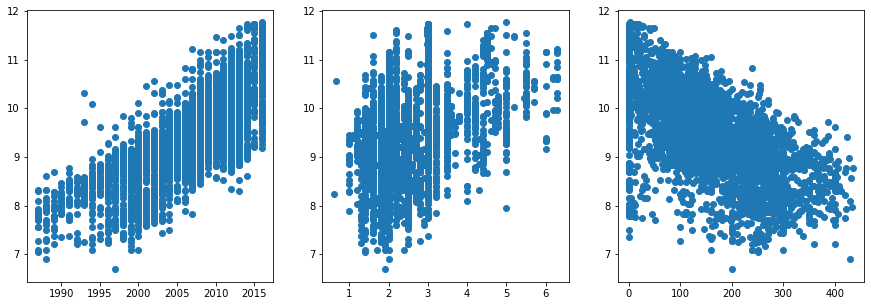

In [230]:
fig,(ax1,ax2,ax3) =plt.subplots(1,3,figsize=(15,5))
ax1.scatter(x=x["Year"],y=x["log_price"])
ax2.scatter(x=x["EngineV"],y=x["log_price"])
ax3.scatter(x=x["Mileage"],y=x["log_price"])

In [231]:
x.drop("Price",axis=1,inplace=True)

E:\Anacondafiles\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [232]:
x.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656


# Check For Multicollinearity

In [233]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x[["Mileage","Year","EngineV"]]
# others are catagorical variables
vif=pd.DataFrame()
vif["FEATURES"]=variables.columns
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]

In [234]:
vif

,FEATURES,VIF
0,Mileage,3.797617
1,Year,10.390939
2,EngineV,7.662210


In [235]:
x.drop("Year",axis=1,inplace=True)

E:\Anacondafiles\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [236]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables=x[["Mileage","EngineV"]]
# others are catagorical variables
vif=pd.DataFrame()
vif["FEATURES"]=variables.columns
vif["VIF"]=[variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif

,FEATURES,VIF
0,Mileage,2.80016
1,EngineV,2.80016


In [237]:
x.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


# create dummy

In [238]:
X=pd.get_dummies(x,drop_first=True)
X.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [239]:
X.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [241]:
cols=['Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
x=X[cols]

In [242]:
x.head()

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# LinearRegression Model

In [243]:
target=X[["log_price"]]
inputs=X.drop("log_price",axis=1)


# Scale the data

In [244]:
from sklearn.preprocessing import StandardScaler

In [245]:
scaler=StandardScaler()

In [246]:
scaler.fit(inputs)

StandardScaler()

In [248]:
inputs_scaled=scaler.transform(inputs)

# Train  and Test`

In [250]:
from sklearn.model_selection import train_test_split

In [257]:
x_train,x_test,y_train,y_test=train_test_split(inputs_scaled,target,test_size=0.2,random_state=1)

#  Create a LinearRegression

In [258]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [269]:
X

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
4339,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
4340,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
4341,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [261]:
yhat=lm.predict(x_train)

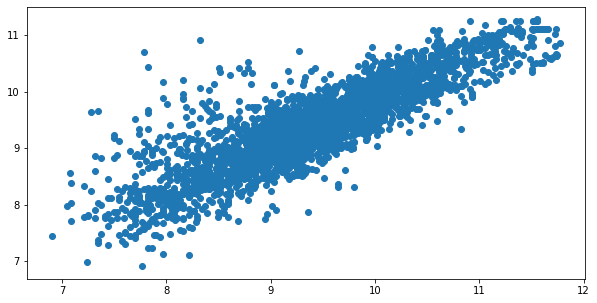

In [263]:
plt.figure(figsize=(10,5))
plt.scatter(y_train,yhat)

<AxesSubplot:ylabel='Density'>

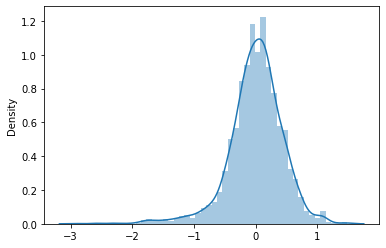

In [265]:
sns.distplot(y_train-yhat)

In [266]:
lm.score(x_train,y_train)

0.7466546364280854

In [267]:
lm.coef_

array([[-0.46871216,  0.21179254,  0.01912746,  0.01556241, -0.13738617,
        -0.18032076, -0.04932414, -0.08526692, -0.1557753 , -0.09399754,
        -0.19172663, -0.1243798 , -0.15299473, -0.12050797, -0.03828204,
        -0.14842424,  0.31034551]])

In [268]:
lm.intercept_

array([9.40863376])

In [299]:
for i,j in enumerate(X.columns):
    print("{} {}".format(j,lm.coef_[0][i]))

Mileage -0.4687121567428654
EngineV 0.21179253997950145
log_price 0.01912745914678382
Brand_BMW 0.015562407866390456
Brand_Mercedes-Benz -0.13738616900338574
Brand_Mitsubishi -0.1803207599383976
Brand_Renault -0.04932413825291906
Brand_Toyota -0.08526692468314692
Brand_Volkswagen -0.15577530491476616
Body_hatch -0.09399754348674423
Body_other -0.19172662910813115
Body_sedan -0.12437979694177619
Body_vagon -0.1529947293453592
Body_van -0.12050796985503115
Engine Type_Gas -0.03828204395182412
Engine Type_Other -0.1484242401504937
Engine Type_Petrol 0.31034551376480746


IndexError: index 17 is out of bounds for axis 0 with size 17

# Testing

In [301]:
yhat_test=lm.predict(x_test)

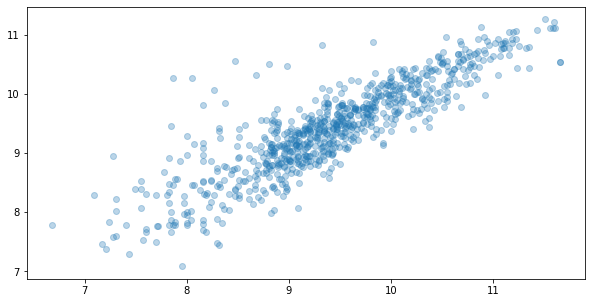

In [303]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,yhat_test,alpha=0.3)

In [305]:
lm.score(x_train,y_train)

0.7466546364280854

In [306]:
lm.score(x_test,y_test)

0.761770108335597

In [311]:
from sklearn import metrics
metrics.explained_variance_score(y_test, yhat_test)

0.7617854623265822